In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


First we load up the data. This data corresponds to the 1-5 + 5-1 degenerate eigenmode.

In [2]:
data_filename = '15_900_905_0.2.npy'
amplitude = np.load('data/'+data_filename)
summed_z = np.sum(amplitude, 2)
print(data_filename)

15_900_905_0.2.npy


Here is the data without antialiasing:

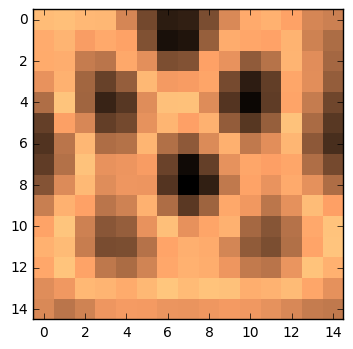

In [3]:
plt.imshow(summed_z, cmap='copper_r', interpolation='none')
plt.show()

Here is the data with antialising:

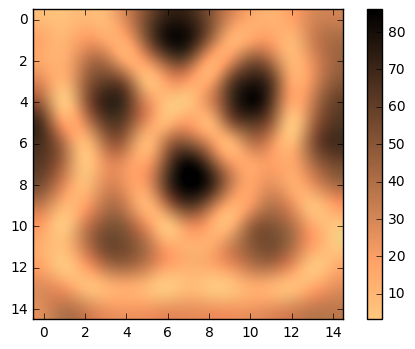

In [4]:
plt.imshow(summed_z, cmap='copper_r', interpolation='lanczos')
plt.colorbar()

We will always display our plots in this report in the antialiased form, as it is clearer. However, all analysis and calculations is done with the raw maps. 

Now, we generate a theoretical plot:

$f5(x)*f1(y)$ is 5-1. 

We have $f5(x)=0.583\cos(5 x) + 0.71429\cos(7 x)$, and $f1(x) = 0.75 (\cos(x) + 0.333\cos(3 x))$.

Here are the associated functions:

In [5]:
f1 = lambda x: 0.75*(np.cos(x) + 0.333*np.cos(3.*x))
f5 = lambda x: 0.583*np.cos(5.*x) + 0.71429*np.cos(7.*x)

Here is the range we are working over. Note that this range is approximate due to how well we know the sides of our plate:

In [6]:
steps_to_edge = 7950. #\pm 50
steps_taken_max = 5000. #(some data has 5000)
phase_at_edge = 1.0
phase_at_max = phase_at_edge*steps_taken_max/steps_to_edge
grid_size = 15
x_domain = np.linspace(-phase_at_edge, phase_at_edge, grid_size)
y_domain = np.copy(x_domain)

Now, we calculate the theoretical relative amplitude at each of these grid points:

In [7]:
five_one_theory_amplitude = np.dot(f5(x_domain)[:, None],f1(y_domain)[None])
one_five_theory_amplitude = np.dot(f1(x_domain)[:, None],f5(y_domain)[None])

Finally, here is the colormap of the 1-5+5-1 degenerate eigenmode, over our mapped region:

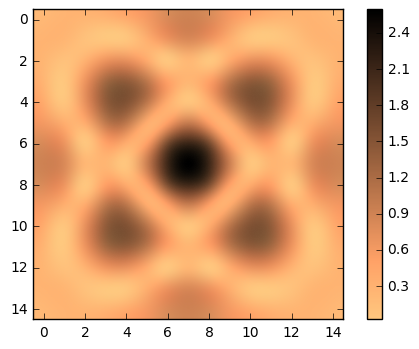

In [8]:
plt.imshow(np.abs(one_five_theory_amplitude+five_one_theory_amplitude),
           cmap='copper_r', interpolation='lanczos')
plt.colorbar()

In [9]:
minimize(lambda a: np.sum(np.square(a*np.abs(one_five_theory_amplitude+five_one_theory_amplitude) - summed_z)),
        x0=[1])

      fun: 66430.69256267615
 hess_inv: array([[ 0.00465843]])
      jac: array([ 0.])
  message: 'Optimization terminated successfully.'
     nfev: 30
      nit: 5
     njev: 10
   status: 0
  success: True
        x: array([ 42.63954359])

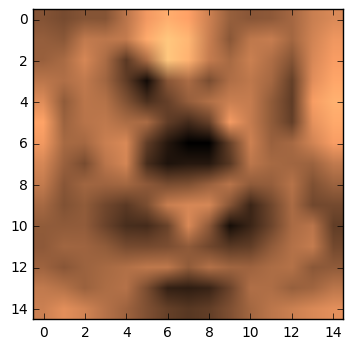

In [57]:
plt.imshow(42.63954359*np.abs(one_five_theory_amplitude+five_one_theory_amplitude) - summed_z, cmap='copper_r')